In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#cv2.imread() method loads an image from the specified file
img_array=cv2.imread("Driverdataset/Training/Closed_eyes/s0002_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

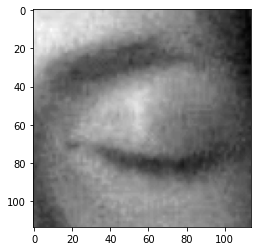

In [3]:
plt.imshow(img_array,cmap="gray")


In [4]:
img_array.shape

(114, 114)

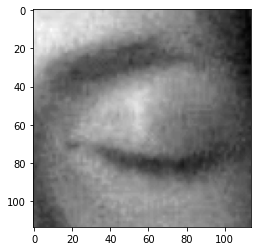

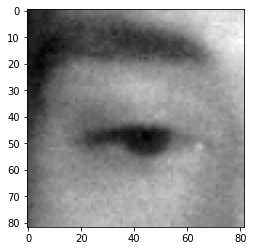

In [5]:
Data="Driverdataset/Training/"
Classes=["Closed_eyes","Open_eyes"]
for category in Classes:
    path=os.path.join(Data,category)
    for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
            plt.imshow(img_array,cmap="gray")
            plt.show()
            break
    

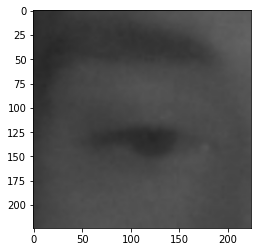

In [6]:
img_size=224
new_array=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")

# Reading all images and converting them into array for data and labels

In [7]:
training_data=[]
def create_trainingdata():
    for category in Classes:
        path=os.path.join(Data,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_trainingdata()

In [9]:
print(len(training_data))
#training_data

2013


In [10]:
import random
random.shuffle(training_data)
#training_data

In [11]:
X=[]
Y=[]
for features,labels in training_data:
    X.append(features)
    Y.append(labels)
X=np.array(X).reshape(-1,img_size,img_size,3)

In [12]:
X.shape

(671, 224, 224, 3)

In [13]:
X=X/255.0
X

array([[[[0.25490196, 0.25490196, 0.25098039],
         [0.25098039, 0.25098039, 0.25098039],
         [0.25098039, 0.25098039, 0.25098039],
         ...,
         [0.43529412, 0.43921569, 0.43921569],
         [0.43921569, 0.43921569, 0.43529412],
         [0.43921569, 0.43921569, 0.44313725]],

        [[0.24313725, 0.24313725, 0.24705882],
         [0.25098039, 0.25490196, 0.25882353],
         [0.25882353, 0.2627451 , 0.25882353],
         ...,
         [0.43529412, 0.43921569, 0.43921569],
         [0.43921569, 0.43529412, 0.43529412],
         [0.43529412, 0.43529412, 0.43529412]],

        [[0.23137255, 0.23529412, 0.23921569],
         [0.24705882, 0.25098039, 0.25098039],
         [0.25490196, 0.25882353, 0.25490196],
         ...,
         [0.43921569, 0.43921569, 0.43921569],
         [0.43921569, 0.43921569, 0.43529412],
         [0.43529412, 0.43137255, 0.43137255]],

        ...,

        [[0.35294118, 0.34901961, 0.34901961],
         [0.34901961, 0.34901961, 0.34901961]

In [14]:
Y=np.array(Y)
Y

array([0, 1, 1, ..., 0, 1, 1])

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
#model=tf.keras.applications.mobilenet.MobileNet()
#model.summary()

In [17]:
#base_input=model.layers[0].input
#base_output=model.layers[-4].output

In [18]:
#Flat_layer=layers.Flatten()(base_output)
#final_output=layers.Dense(1)(Flat_layer)
#final_output=layers.Activation('sigmoid')(final_output)

In [19]:
#new_model=keras.Model(inputs=base_input,outputs=final_output)
#new_model.summary()

In [20]:
#new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [21]:
#new_model.fit(X,Y,epochs=30,validation_split=0.3)

In [22]:
#new_model.save('my_model.h5')



In [23]:
new_model = tf.keras.models.load_model("mymodel1.h5")


In [24]:
img_array=cv2.imread('Driverdataset/Training/Open_eyes/s0001_02279_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(img_size,img_size))

In [25]:
X_input=np.array(new_array).reshape(1,img_size,img_size,3)
X_input.shape

(1, 224, 224, 3)

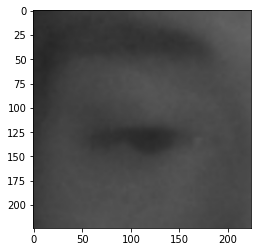

In [26]:
plt.imshow(new_array)

In [27]:
X_input=X_input/255.0
prediction=new_model.predict(X_input)
prediction=int(prediction)
prediction

0

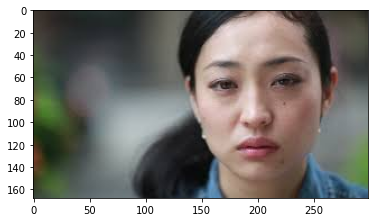

In [28]:
img=cv2.imread('woman.jpg')

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [29]:
facecascade=cv2.CascadeClassifier( cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eyecascade=cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eyes=eyecascade.detectMultiScale(gray,2.0,4)

In [30]:
for (x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

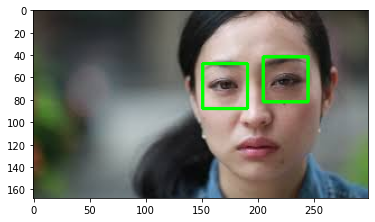

In [31]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [32]:
for (x,y,w,h) in eyes:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyess=eyecascade.detectMultiScale(roi_gray)
    if(len(eyess)==0):
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]

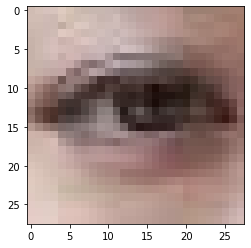

In [33]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [34]:
eyes_roi.shape

(28, 28, 3)

In [35]:
final_image=cv2.resize(eyes_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [36]:
final_image.shape

(1, 224, 224, 3)

In [37]:
new_model.predict(final_image)


array([[0.31221247]], dtype=float32)

In [43]:
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")
while True:
    ret , frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in eyes:
        roi_gray = gray[y:y+h , x : x+w]
        roi_color = frame[y:y+h , x:x+w]
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for(ex , ey , ew , eh) in eyess:
                eyes_roi = roi_color[ey:ey + eh , ex:ex + ew]
               
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image = final_image/255.0
   
    Predictions = new_model.predict(final_image)
    if(Predictions >0.5):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
       
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
   
    for(x,y,w,h) in eyes:
        cv2.rectangle(frame, (x,y), (x+w , y+h) , (0,255,0),2)
       
    font = cv2.FONT_HERSHEY_SIMPLEX
   
   
    cv2.putText(frame,
                status,
                (50,50),
                font , 3,
                (0,0,255),
                2,
                cv2.LINE_4)
   
    cv2.imshow("Drowsiness Detection",frame)
   
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
eyes are not detected
False
False
False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
eyes are not detected
False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
eyes are not detected
False
eyes are not detected
False
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
False
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
eyes